In [2]:
import pickle
import pandas as pd
import seaborn as sns
import sys
from scipy.spatial import distance

import bluepyopt as bpopt
import bluepyopt.ephys as ephys

import matplotlib.pyplot as plt
import MEAutility as mu
import json
import time
import numpy as np
import LFPy
from pathlib import Path

%matplotlib notebook

In [ ]:
def vectorize_features(feature_list):
    feature_vectors = []
    for feature in feature_list:
        feature_vector = {}
        for prot, prot_dict in feature.items():
            for loc, loc_feat in prot_dict.items():
                for feat, feat_val in loc_feat.items():
                    feature_vector[f'{prot}.{loc}.{feat}'] = feat_val[0]
        feature_vectors.append(feature_vector)
    return feature_vectors

In [5]:
result_folder = Path('tanguy_data/')

In [6]:
random_params = pd.read_csv(result_folder / 'params' / 'random.csv', index_col='index')

In [7]:
random_params

,gNaTs2_tbar_NaTs2_t.apical,gSKv3_1bar_SKv3_1.apical,gImbar_Im.apical,gNaTa_tbar_NaTa_t.axonal,gK_Tstbar_K_Tst.axonal,gamma_CaDynamics_E2.axonal,gNap_Et2bar_Nap_Et2.axonal,gSK_E2bar_SK_E2.axonal,gCa_HVAbar_Ca_HVA.axonal,gK_Pstbar_K_Pst.axonal,gSKv3_1bar_SKv3_1.axonal,decay_CaDynamics_E2.axonal,gCa_LVAstbar_Ca_LVAst.axonal,gamma_CaDynamics_E2.somatic,gSKv3_1bar_SKv3_1.somatic,gSK_E2bar_SK_E2.somatic,gCa_HVAbar_Ca_HVA.somatic,gNaTs2_tbar_NaTs2_t.somatic,decay_CaDynamics_E2.somatic,gCa_LVAstbar_Ca_LVAst.somatic
index,,,,,,,,,,,,,,,,,,,,
random_0,0.028444,0.004417,0.000161,3.471240,0.071471,0.003161,0.006423,0.007528,0.000812,0.920779,0.819891,234.163222,0.007412,0.000650,0.339137,0.007840,0.000932,0.928773,187.416285,0.000372
random_1,0.021205,0.004462,0.000146,3.590743,0.096855,0.002894,0.005615,0.005779,0.000904,0.791506,1.194313,281.188169,0.008538,0.000517,0.354399,0.009387,0.000808,0.933461,183.297287,0.000289
random_2,0.028846,0.005032,0.000169,2.964580,0.086891,0.003260,0.007938,0.007100,0.000862,0.976566,1.217068,289.349948,0.009860,0.000576,0.293686,0.007534,0.000880,0.810062,234.849365,0.000347
random_3,0.022013,0.004221,0.000167,3.402216,0.089102,0.003214,0.007379,0.008446,0.000829,0.817956,1.041322,268.950852,0.008235,0.000618,0.310203,0.009167,0.000925,0.960017,172.169473,0.000284
random_4,0.024137,0.004367,0.000143,2.625319,0.082626,0.002405,0.006152,0.007908,0.000913,0.997002,0.980895,247.533445,0.008200,0.000633,0.296261,0.008351,0.000939,0.970080,214.675742,0.000314
random_5,0.028167,0.004595,0.000165,3.316045,0.092789,0.003088,0.006726,0.006507,0.000793,0.869003,0.857323,296.632973,0.009568,0.000552,0.301606,0.009448,0.000910,0.979282,238.011029,0.000315
random_6,0.022717,0.003490,0.000122,3.750138,0.092272,0.002925,0.007772,0.008408,0.000933,0.985592,0.841265,258.513384,0.008368,0.000556,0.349133,0.008920,0.000951,0.849885,181.909101,0.000351
random_7,0.027508,0.003431,0.000125,2.800607,0.074682,0.003121,0.005865,0.008070,0.000818,0.813347,0.902799,252.329892,0.007934,0.000604,0.359076,0.007978,0.000853,0.854647,193.240982,0.000285
random_8,0.026735,0.004086,0.000151,2.643291,0.074159,0.003309,0.005775,0.006563,0.000860,0.802232,0.868743,286.311823,0.008912,0.000724,0.274534,0.008802,0.000845,0.995570,201.940889,0.000365


In [216]:
import l5pc_model
import l5pc_evaluator
import l5pc_plot

In [28]:
data = pickle.load(open(result_folder / 'runs.pkl', 'rb'))
df = pd.DataFrame(data)

In [29]:
df.head()

,nevals,hof,logbook,sample_id,seed,feature_set,best_fitness,best_scores,best_params,params_name
0,"[250, 500, 750, 1000, 1250, 1500, 1750, 2000, ...","([0.017283818493159134, 0.019293664468997426, ...","[{'gen': 1, 'nevals': 250, 'avg': 5328.3221539...",4,7,extra,36.621157,"[0.6419293847915989, 2.496716708052376, 1.4463...","[0.017283818493159134, 0.019293664468997426, 0...","[gNaTs2_tbar_NaTs2_t.apical, gSKv3_1bar_SKv3_1..."
1,"[250, 500, 750, 1000, 1250, 1500, 1750, 2000, ...","([0.029231993009928747, 0.012647715225437534, ...","[{'gen': 1, 'nevals': 250, 'avg': 4251.0726634...",4,6,soma,10.199671,"[0.9527733766586272, 0.6622212576412014, 0.042...","[0.029231993009928747, 0.012647715225437534, 0...","[gNaTs2_tbar_NaTs2_t.apical, gSKv3_1bar_SKv3_1..."
2,"[250, 500, 750, 1000, 1250, 1500, 1750, 2000, ...","([0.026272457590550646, 0.019640360274943185, ...","[{'gen': 1, 'nevals': 250, 'avg': 4584.1832678...",4,4,bap,10.997233,"[0.0, 0.07186343763772736, 0.0, 0.567553303957...","[0.026272457590550646, 0.019640360274943185, 0...","[gNaTs2_tbar_NaTs2_t.apical, gSKv3_1bar_SKv3_1..."
3,"[250, 500, 750, 1000, 1250, 1500, 1750, 2000, ...","([0.02848520684269956, 0.015243245707649206, 0...","[{'gen': 1, 'nevals': 250, 'avg': 4793.4879934...",4,8,extra,34.028643,"[0.7325950089955611, 1.1706914148683234, 2.197...","[0.02848520684269956, 0.015243245707649206, 0....","[gNaTs2_tbar_NaTs2_t.apical, gSKv3_1bar_SKv3_1..."
4,"[250, 500, 750, 1000, 1250, 1500, 1750, 2000, ...","([0.0008246390737213635, 0.007869344782298258,...","[{'gen': 1, 'nevals': 250, 'avg': 4237.6946490...",4,2,soma,15.029717,"[0.6109572639429545, 0.6487432296063429, 0.733...","[0.0008246390737213635, 0.007869344782298258, ...","[gNaTs2_tbar_NaTs2_t.apical, gSKv3_1bar_SKv3_1..."


### Compute complete set of features for all samples

soma + bap + extra

In [10]:
mea_positions = np.zeros((20, 3))
mea_positions[:, 2] = 20
mea_positions[:, 1] = np.linspace(-500, 1000, 20)
probe = mu.return_mea(info={'pos': list([list(p) for p in mea_positions]), 'center': False, 'plane': 'xy'})
electrode = LFPy.RecExtElectrode(probe=probe, method='linesource')

In [13]:
channels = None

morphology = ephys.morphologies.NrnFileMorphology('morphology/C060114A7.asc', do_replace_axon=True)
param_configs = json.load(open('config/parameters.json'))
parameters = l5pc_model.define_parameters()
mechanisms = l5pc_model.define_mechanisms()

l5pc_cell = ephys.models.LFPyCellModel('l5pc', 
                                       v_init=-65., 
                                       morph=morphology, 
                                       mechs=mechanisms, 
                                       params=parameters)

param_names = [param.name for param in l5pc_cell.params.values() if not param.frozen]      
feature_set = 'all'

print(f'Feature set {feature_set}')
gt_responses = []

if feature_set in ["extra", "all"]:
    fitness_protocols = l5pc_evaluator.define_protocols(electrode) 
else:
    fitness_protocols = l5pc_evaluator.define_protocols() 

if feature_set in ["extra", "all"]:
    sim = ephys.simulators.LFPySimulator(LFPyCellModel=l5pc_cell, cvode_active=True, electrode=electrode)
else:
    sim = ephys.simulators.LFPySimulator(LFPyCellModel=l5pc_cell, cvode_active=True)

Feature set all


In [30]:
param_names

['gNaTs2_tbar_NaTs2_t.apical',
 'gSKv3_1bar_SKv3_1.apical',
 'gImbar_Im.apical',
 'gNaTa_tbar_NaTa_t.axonal',
 'gNap_Et2bar_Nap_Et2.axonal',
 'gK_Pstbar_K_Pst.axonal',
 'gK_Tstbar_K_Tst.axonal',
 'gSK_E2bar_SK_E2.axonal',
 'gSKv3_1bar_SKv3_1.axonal',
 'gCa_HVAbar_Ca_HVA.axonal',
 'gCa_LVAstbar_Ca_LVAst.axonal',
 'gamma_CaDynamics_E2.axonal',
 'decay_CaDynamics_E2.axonal',
 'gNaTs2_tbar_NaTs2_t.somatic',
 'gSKv3_1bar_SKv3_1.somatic',
 'gSK_E2bar_SK_E2.somatic',
 'gCa_HVAbar_Ca_HVA.somatic',
 'gCa_LVAstbar_Ca_LVAst.somatic',
 'gamma_CaDynamics_E2.somatic',
 'decay_CaDynamics_E2.somatic']

In [31]:
df.params_name.iloc[0]

['gNaTs2_tbar_NaTs2_t.apical',
 'gSKv3_1bar_SKv3_1.apical',
 'gImbar_Im.apical',
 'gNaTa_tbar_NaTa_t.axonal',
 'gK_Tstbar_K_Tst.axonal',
 'gamma_CaDynamics_E2.axonal',
 'gNap_Et2bar_Nap_Et2.axonal',
 'gSK_E2bar_SK_E2.axonal',
 'gCa_HVAbar_Ca_HVA.axonal',
 'gK_Pstbar_K_Pst.axonal',
 'gSKv3_1bar_SKv3_1.axonal',
 'decay_CaDynamics_E2.axonal',
 'gCa_LVAstbar_Ca_LVAst.axonal',
 'gamma_CaDynamics_E2.somatic',
 'gSKv3_1bar_SKv3_1.somatic',
 'gSK_E2bar_SK_E2.somatic',
 'gCa_HVAbar_Ca_HVA.somatic',
 'gNaTs2_tbar_NaTs2_t.somatic',
 'decay_CaDynamics_E2.somatic',
 'gCa_LVAstbar_Ca_LVAst.somatic']

In [53]:
gt_features = []
gt_responses = []
for i, (index, params) in enumerate(random_params.iterrows()):
    print(f'{i+1} / {len(random_params)}, {index}')
    
    feature_folder = f'config/features/{index}'
    _, response, feature_dict = l5pc_evaluator.compute_feature_values(params, l5pc_cell, fitness_protocols, sim, 
                                                                      feature_set=feature_set, probe=probe, 
                                                                      channels=channels,
                                                                      feature_folder=feature_folder,
                                                                      save_to_file=False)
    gt_features.append(feature_dict)
    gt_responses.append(response)

1 / 30, random_0
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
2 / 30, random_1
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
3 / 30, random_2
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
4 / 30, random_3
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
5 / 30, random_4
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
6 / 30, random_5
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
7 / 30, random_6
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
8 / 30, random_7
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
9 / 30, random_8
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
10 / 30, random_9
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
11 / 30, random_10
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
12 / 30, random_11
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
13 / 30, random_12
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
14 / 30, random_13
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
15 / 30, random_14
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
16 / 30, random_15
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
17 / 30, random_16
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
18 / 30, random_17
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
19 / 30, random_18
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
20 / 30, random_19
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
21 / 30, random_20
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
22 / 30, random_21
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
23 / 30, random_22
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
24 / 30, random_23
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
25 / 30, random_24
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
26 / 30, random_25
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
27 / 30, random_26
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
28 / 30, random_27
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
29 / 30, random_28
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
30 / 30, random_29
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150


In [37]:
fitted_features = []
fitted_responses = []
for i, (index, fit) in enumerate(df.iterrows()):
    params = pd.Series(data=fit['best_params'], index=fit['params_name'])
    print(f'{i+1} / {len(df)}')
    
    feature_folder = f'config/features/{index}'
    _, response, feature_dict = l5pc_evaluator.compute_feature_values(params, l5pc_cell, fitness_protocols, sim, 
                                                                      feature_set=feature_set, probe=probe, 
                                                                      channels=channels,
                                                                      feature_folder=feature_folder,
                                                                      save_to_file=False)
    fitted_features.append(feature_dict)
    fitted_responses.append(response)

1 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
2 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
3 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
4 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
5 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
6 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
7 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
8 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
9 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
10 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
11 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
12 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
13 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
14 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
15 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
16 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
17 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
18 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
19 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
20 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
21 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
22 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
23 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
24 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
25 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
26 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
27 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
28 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
29 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
30 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
31 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
32 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
33 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
34 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
35 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
36 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
37 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
38 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
39 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
40 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
41 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
42 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
43 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
44 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
45 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
46 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
47 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
48 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
49 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
50 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
51 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
52 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
53 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
54 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
55 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
56 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
57 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
58 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
59 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
60 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
61 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
62 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
63 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
64 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
65 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
66 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
67 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
68 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
69 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
70 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
71 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
72 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
73 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
74 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
75 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
76 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
77 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
78 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
79 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
80 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
81 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
82 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
83 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
84 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
85 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
86 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
87 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
88 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
89 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
90 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
91 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
92 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
93 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
94 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
95 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
96 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
97 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
98 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
99 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
100 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
101 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
102 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
103 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
104 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
105 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
106 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
107 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
108 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
109 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
110 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
111 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
112 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
113 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
114 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
115 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
116 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
117 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
118 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
119 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
120 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
121 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
122 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
123 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
124 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
125 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
126 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
127 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
128 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
129 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
130 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
131 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
132 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
133 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
134 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
135 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
136 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
137 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150
138 / 138
Running bAP


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step3


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step2


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


Running Step1


/Users/abuccino/Documents/Codes/modeling/BluePyOpt/bluepyopt/ephys/simulators.py:76: UserWarning: Unable to find Neuron hoc shared library in /Applications/NEURON-7.7/nrn/lib/python/neuron, not disabling banner
  'not disabling banner' % nrnpy_path)


bAP Num features: 5
Step3 Num features: 10
Step2 Num features: 10
Step1 Num features: 150


In [54]:
gt_features_v = vectorize_features(gt_features)
fitted_features_v = vectorize_features(fitted_features)

In [62]:
fitted_features[0]

{'bAP': {'soma': {'AP_width': [1.0000000000002274, 0.20000000000004547],
   'AP_height': [38.533574829083406, 7.706714965816682],
   'Spikecount': [1.0, 0.2]}},
 'Step3': {'soma': {'AP_height': [17.554536757900173, 3.510907351580035],
   'AHP_slow_time': [0.11625682171001978, 0.023251364342003956],
   'ISI_CV': [0.0730633948913583, 0.01461267897827166],
   'doublet_ISI': [14.500000000003297, 2.9000000000006594],
   'adaptation_index2': [0.004513550151914884, 0.0009027100303829769],
   'mean_frequency': [19.227850022782846, 3.8455700045565693],
   'AHP_depth_abs_slow': [-57.22000584366707, 11.444001168733415],
   'AP_width': [0.8710526315783437, 0.17421052631566875],
   'time_to_first_spike': [10.700000000093041, 2.1400000000186084],
   'AHP_depth_abs': [-57.30710750325511, 11.461421500651022]}},
 'Step2': {'soma': {'AP_height': [26.848411881805436, 5.369682376361087],
   'AHP_slow_time': [0.07016040548635818, 0.014032081097271637],
   'ISI_CV': [0.052274304658825474, 0.0104548609317650

In [75]:
complete_bap = []
for i, gt in enumerate(list(gt_features_v)):
    bap_feat = [k for k in gt.keys() if 'bAP' in k]
    if len(bap_feat) == 5:
        complete_bap.append(i)

In [76]:
print(len(complete_bap))

23


In [83]:
complete_bap

[0,
 2,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29]

### Compute distances

In [209]:
param_distances = []
feature_distances = []
feat_soma_dist = []
feat_dens_dist = []
feat_mea_dist = []
channels = None

for i, (index, fit) in enumerate(df.iterrows()):
    sample_id = int(fit.sample_id)
    gt_params = random_params.iloc[sample_id]
    param_dist = distance.cosine(fit['best_params'], gt_params)
    param_distances.append(param_dist)
    
    selected_keys = []
    for k in gt_features_v[sample_id].keys():
        if 'MEA' not in k:
            selected_keys.append(k)
        else:
            if channels is not None:
                if int(k[-1]) in channels:
                    selected_keys.append(k)
                else:
                    selected_keys.append(k)
    gt_feat, fitted_feat = [], []
    for k in selected_keys:
        if k in gt_features_v[sample_id] and k in fitted_features_v[i]:
            gt_feat.append(gt_features_v[sample_id][k])
            fitted_feat.append(fitted_features_v[i][k])
    feature_dist = distance.cosine(fitted_feat, gt_feat)
    feature_distances.append(feature_dist)

In [44]:
df['param_dist'] = param_distances

In [212]:
df['feat_dist'] = feature_distances

<IPython.core.display.Javascript object>


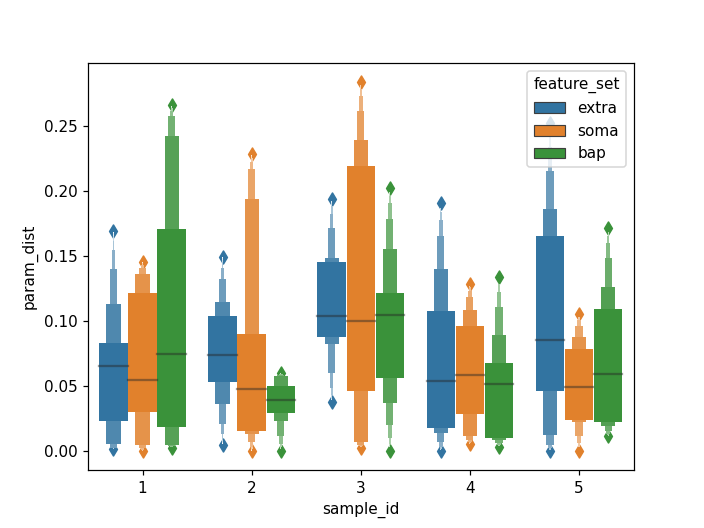

In [202]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
sns.boxenplot(data=df, x='sample_id', y='param_dist', hue='feature_set', ax=ax1)

<IPython.core.display.Javascript object>


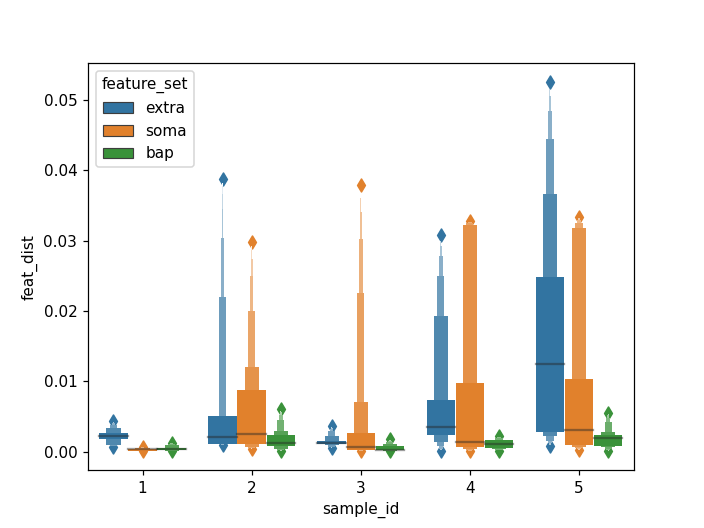

In [213]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
sns.boxenplot(data=df, x='sample_id', y='feat_dist', hue='feature_set', ax=ax2)

In [196]:
gt_id = 0
df_1 = df[df.sample_id == str(gt_id + 1)]
fitted_1 = np.array(fitted_responses)[np.array(df_1.index)]

In [197]:
colors = {'soma': 'C0', 'bap': 'C1', 'extra': 'C2'}

In [198]:
color_list = []
for i in range(len(df_1)):
    color_list.append(colors[df_1.iloc[i].feature_set])
color_list.append('k')

['C2', 'C0', 'C1', 'C2', 'C0', 'C1', 'C2', 'C2', 'C0', 'C2', 'C1', 'C0', 'C1', 'C0', 'C2', 'C1', 'C1', 'C1', 'C0', 'C2', 'C2', 'C1', 'C0', 'C1', 'C1', 'C2', 'C2', 'C0', 'C0', 'k']


<IPython.core.display.Javascript object>


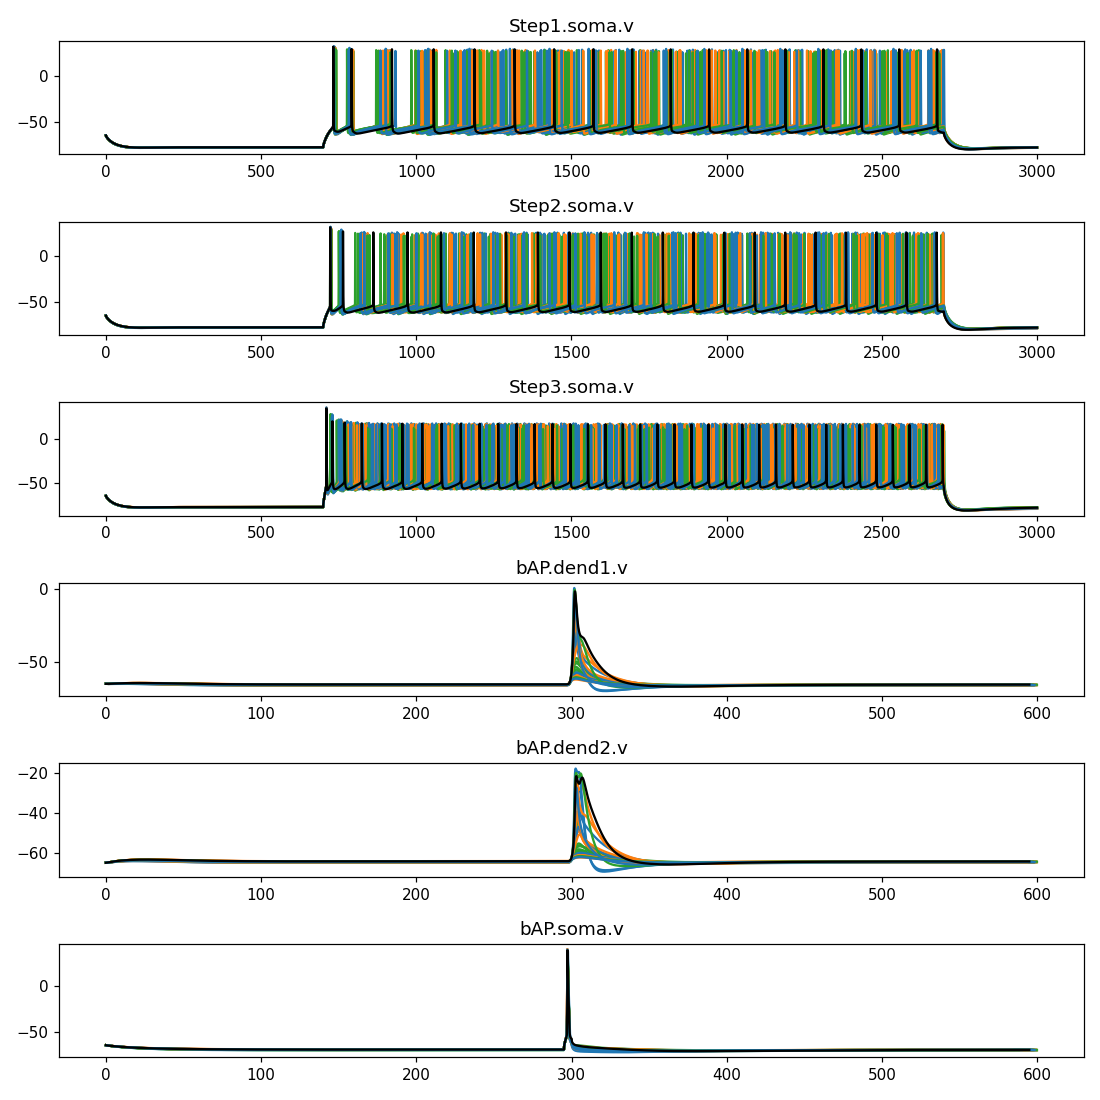

In [199]:
plot_multiple_responses(responses_list=np.concatenate((fitted_1, [gt_responses[gt_id]])), 
                        colors=color_list)

In [170]:
def plot_multiple_responses(responses_list, colors=None, return_fig=False):
    print(colors)
    responses = responses_list[0]
    resp_no_mea = []
    for (resp_name, response) in sorted(responses.items()):
        if 'MEA' not in resp_name:
            resp_no_mea.append(resp_name)
    fig, axes = plt.subplots(len(resp_no_mea), figsize=(10, 10))
    for i, responses in enumerate(responses_list):
        if colors is None:
            color = f'C{i}'
        else:
            color = colors[i]
        for index, resp_name in enumerate(sorted(resp_no_mea)):
            response = responses[resp_name]
            axes[index].plot(response['time'], response['voltage'], label=resp_name, color=color)
            axes[index].set_title(resp_name)
    fig.tight_layout()
    fig.show()

    if return_fig:
        return fig

In [224]:
cmap = plt.get_cmap('rainbow')

<IPython.core.display.Javascript object>


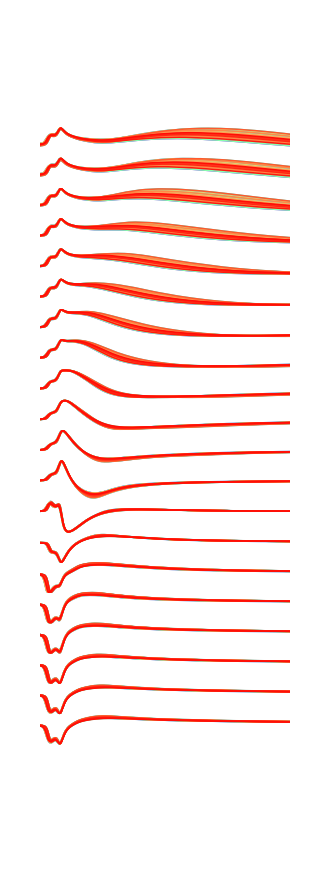

In [226]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
for i, gt in enumerate(gt_responses):
    eap = l5pc_evaluator.calculate_eap(responses=gt, protocols=fitness_protocols,
                                       protocol_name='Step3')
    eap_norm = eap / np.max(np.abs(eap), 1, keepdims=True)
    mu.plot_mea_recording(eap_norm, 
                          probe, colors=cmap(i/len(gt_responses)), ax=ax3)

<IPython.core.display.Javascript object>


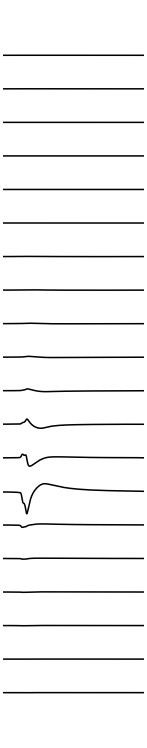